### sample_redmagic

Drawing a population of redmagic galaxies which matches the distribution of lens candidates in $R_{{\rm eff},r}-z_{\rm{phot}}$ space.

In [38]:
# math, array manipulation, etc.
import numpy as np

import os
import sys
print(sys.version)

# timing
from timeit import default_timer
from tqdm import tqdm

import pandas as pd

import astropy.io.fits as fits
from astropy.table import Table                    # Table data structure

# plots
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

3.10.4 (main, Mar 31 2022, 03:38:35) [Clang 12.0.0 ]


/Users/aidan/opt/anaconda3/envs/gal-gal-sel/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
sys.path.append('/Users/aidan/Desktop/sl_project/galaxy-galaxy-sel/')

from aidan_utils import plot_prettier

# only need to run once
plot_prettier()


In [47]:
path = '/Users/aidan/Desktop/sl_project/production/'
results_filename = path + 'lens_results.csv'

results = pd.read_csv(results_filename)

photo_z = results['photo_z']
reff_r = results['halflightrad_r_50']

max_ind = np.argmax(reff_r)
#reff_r = np.delete(np.array(reff_r), max_ind)
#photo_z = np.delete(np.array(photo_z), max_ind)

print(results['sersicindex_r_16'][max_ind])
print(results['sersicindex_r_50'][max_ind])
print(results['sersicindex_r_84'][max_ind])

print(max_ind)


0.8264233281966773
0.9044899223857256
0.9572261104456864
80


(0.0, 15.0)

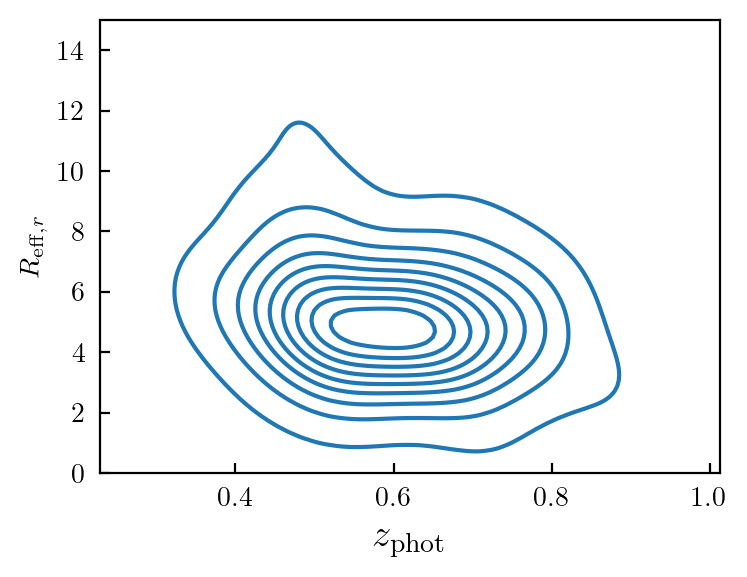

In [49]:

fig, ax = plt.subplots(1,1, figsize=(4,3))

sns.kdeplot(x=photo_z, y=reff_r, ax=ax)
ax.set_xlabel(r'$z_{\rm phot}$', fontsize=14)
ax.set_ylabel(r'$R_{{\rm eff}, r}$')
ax.set_ylim(0,15)
